In [1]:
num_friends = [100, 49, 41, 40, 25,
               # ... and lots more
              ]

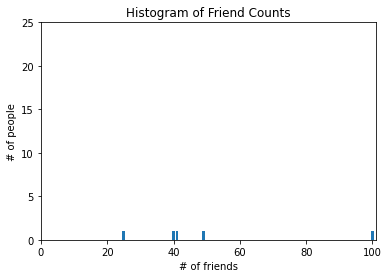

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [3]:
friend_counts[0]

0

In [4]:
num_points = len(num_friends)               # 204
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

In [5]:
from typing import List
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333

51.0

In [6]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [7]:
print(median(num_friends))  # 6

41


In [8]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [9]:
quantile(num_friends, 0.25)

40

In [10]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [11]:
mode([1,2,3,2,2,3,3,4,5,1,4])

[2, 3]

In [15]:
l = [5,3,4,2,1]
s = set(l)
s

{1, 2, 3, 4, 5}

In [16]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [20]:
def sum_of_squares(xs: List[float]) -> float:
    return sum(x_i * x_i for x_i in xs)

def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

In [21]:
def de_mean(xs: List[float]) -> float:
    x_m = mean(xs)
    return [x_i - x_m for x_i in xs]

In [23]:
def variance(xs: List[float]) -> float:
    length = len(xs)
    x_d = de_mean(xs)
    
    return sum_of_squares(x_d)/(length-1)

In [24]:
from math import sqrt

def standard_deviation(xs: List[float]) -> float:
    return sqrt(variance(xs))

In [26]:
standard_deviation([1,2,3, 8, 9])

3.646916505762094

In [27]:
def interquartile_range(xs: List[float]) -> float:
    q1 = quantile(xs, 0.25)
    q3 = quantile(xs, 0.75)
    return q3 - q1

In [28]:
from LinearAlgebra import dot

In [29]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [30]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero